In [1]:
'''matplotlib.pyplot: 用來繪製影像
sklearn.datasets: 用來繪入內建之手寫數字資料庫
sklearn.svm: SVM 支持向量機之演算法物件
sklearn.metrics: 用來評估辨識準確度以及報表的顯示'''
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
#The digits dataset
digits = datasets.load_digits()
'''使用datasets.load_digits()將資料存入，digits為一個dict型別資料，我們可以用以下指令來看一下資料的內容。'''
for key,value in digits.items():
    try:
        print(key,value.shape)
    except:
        print(key)
'''('images', (1797L, 8L, 8L))	共有 1797 張影像，影像大小為 8x8
   ('data', (1797L, 64L))	data 則是將8x8的矩陣攤平成64個元素之一維向量
   ('target_names', (10L,))	說明10種分類之對應 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    DESCR	資料之描述
   ('target', (1797L,))	記錄1797張影像各自代表那一個數字'''

target_names (10,)
target (1797,)
images (1797, 8, 8)
DESCR
data (1797, 64)


"('images', (1797L, 8L, 8L))\t共有 1797 張影像，影像大小為 8x8\n   ('data', (1797L, 64L))\tdata 則是將8x8的矩陣攤平成64個元素之一維向量\n   ('target_names', (10L,))\t說明10種分類之對應 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]\n    DESCR\t資料之描述\n   ('target', (1797L,))\t記錄1797張影像各自代表那一個數字"

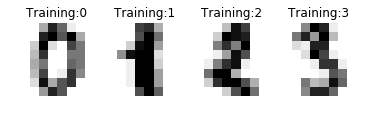

In [21]:
#show images
images_and_labels = list(zip(digits.images,digits.target))
for index,(image,label) in enumerate(images_and_labels[:4]):
    plt.subplot(2 , 4, index + 1)
    plt.axis('off')
    plt.imshow(image , cmap = plt.cm.gray_r , interpolation = 'nearest')
    plt.title('Training:%i'%(label))
plt.show()

In [14]:
'''
接下來的步驟則是使用reshape指令將8x8的影像資料攤平成64x1的矩陣。 
接著用classifier = svm.SVC(gamma=0.001)產生一個SVC分類器(Support Vector Classification)。
再將一半的資料送入分類器來訓練classifier.fit(資料:898x64, 分類目標:898x1)。
SVC之預設kernel function為RBF (radial basis function):  
其中SVC(gamma=0.001)就是在設定RBF函數裏的 這個值必需要大於零。
最後，再利用後半部份的資料來測試訓練完成之SVC分類機predict(data[n_samples / 2:])將預測結果存入predicted變數
而原先的真實目標資料則存於expected變數
'''
n_samples = len(digits.images)

## 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
data = digits.images.reshape(n_samples,-1)
data
# 產生SVC分類器
classifier = svm.SVC(gamma = 0.001)

# 用前半部份的資料來訓練
classifier.fit(data[:int(n_samples / 2)],digits.target[:int(n_samples/2)])

expected = digits.target[int(n_samples / 2 ):]

#利用後半部份來測試分類器共899筆

predicted = classifier.predict(data[int(n_samples / 2) :])
print(expected[:10])
print(predicted[:10])

[8 8 4 9 0 8 9 8 1 2]
[8 8 4 9 0 8 9 8 1 2]


In [15]:
#那在判斷準確度方面，我們可以使用一個名為「混淆矩陣」(Confusion matrix)的方式來統計

print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


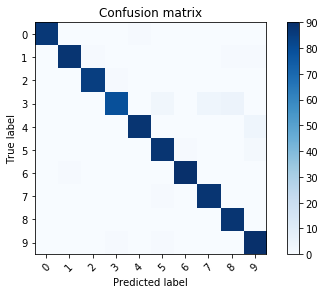

In [20]:
def plot_confusion_matrix(cm,title = 'Confusion matrix',cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest',cmap=cmap )
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names, rotation = 45)
    plt.yticks(tick_marks,digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected,predicted))


'''precision = TP/(TP+FP) = 79/81 = 0.98
判斷為3且實際為3的比例為0.98
recall = TP/(TP+FN) = 79/91 = 0.87
實際為3且判斷為3的比例為0.87
f1-score 則為以上兩者之「harmonic mean 調和平均數」
f1-score= 2 x precision x recall/(recision + recall) = 0.92'''

In [22]:
print('Classification report for classifier %s:\n%s\n'%(classifier,metrics.classification_report(expected,predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




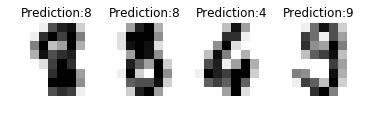

In [24]:
images_and_predictions = list(
                              zip(digits.images[int(n_samples / 2):],predicted))
for index , (image,prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r , interpolation= 'nearest')
    plt.title('Prediction:%i'%(prediction))
plt.show()